In [1]:
import numpy as np
import matplotlib.pyplot as plt
from MCMC import MCMCModel

In [2]:
t = np.linspace(0, 10, 100)

def data_generator(x, A=0):
    noise = A * np.random.random(len(x))
    return x + noise

model = MCMCModel(t, data_generator)

true_a, true_v, _ = model.fit_with_noise(0, 10, -5, 5, 100, 0.1)

a_range = (-2, 2)
v_range = (-4, 4)
num_iterations = 1000
noise_amplitude = 0.1

samples = model.metropolis_hastings(a_range, v_range, num_iterations, noise_amplitude)

i = 0

for sample in samples:
    current_a, current_v = sample
    acceptance_status = "Accepted"
    
    if i > 0:
        previous_a, previous_v = samples[i - 1]
        
        if current_a == previous_a and current_v == previous_v:
            acceptance_status = "Rejected (same as previous)"

    print(f"Trial {i+1}: a = {current_a}, v = {current_v} ({acceptance_status})")
    
    i += 1

Trial 1: a = 0.337093305171952, v = 1.3331931559964394 (Accepted)
Trial 2: a = 0.337093305171952, v = 1.3331931559964394 (Rejected (same as previous))
Trial 3: a = 0.337093305171952, v = 1.3331931559964394 (Rejected (same as previous))
Trial 4: a = 1.4720195713519528, v = -2.6500276138359125 (Accepted)
Trial 5: a = 1.4720195713519528, v = -2.6500276138359125 (Rejected (same as previous))
Trial 6: a = 0.5215421007751138, v = 0.5014748987915745 (Accepted)
Trial 7: a = -0.9476936189084966, v = 0.03728191686478333 (Accepted)
Trial 8: a = 1.8438236202101956, v = 1.9957232211588503 (Accepted)
Trial 9: a = -1.9894832216466782, v = -3.8369806138795752 (Accepted)
Trial 10: a = 0.7668255498235368, v = -1.7965734694863276 (Accepted)
Trial 11: a = 1.4838046678365546, v = -1.887786013554587 (Accepted)
Trial 12: a = 1.4838046678365546, v = -1.887786013554587 (Rejected (same as previous))
Trial 13: a = 1.4838046678365546, v = -1.887786013554587 (Rejected (same as previous))
Trial 14: a = 0.7992383813

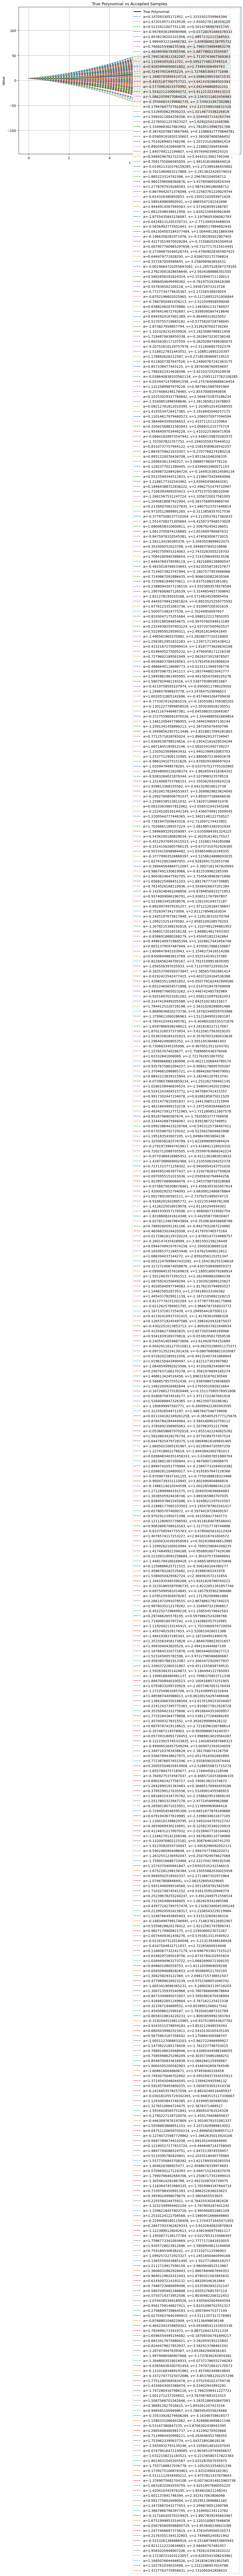

In [3]:
accepted_samples = [samples[j] for j in range(len(samples)) if j == 0 or samples[j] != samples[j - 1]]
accepted_a = [sample[0] for sample in accepted_samples]
accepted_v = [sample[1] for sample in accepted_samples]

plt.figure(figsize=(12, 8))
plt.plot(t, model.polynomial(v=true_v, a=true_a), label='True Polynomial', color='black', linewidth=2)

for a, v in zip(accepted_a, accepted_v):
    plt.plot(t, model.polynomial(v=v, a=a), linestyle='--', label=f'a={a}, v={v}')

plt.title('True Polynomial vs Accepted Samples')
plt.xlabel('t')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()